Sollen die Diagramme gespeichert werden? false
Sollen die Diagramme angezeigt werden? true
Tabelle erstellen? false


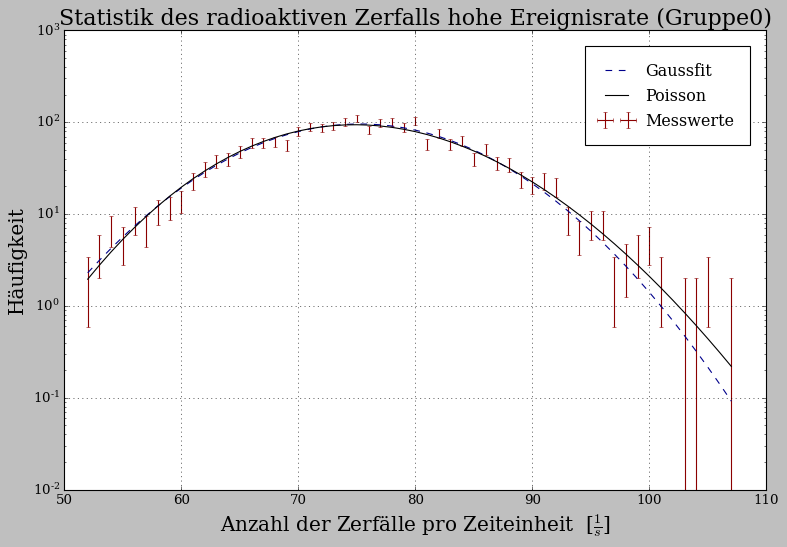

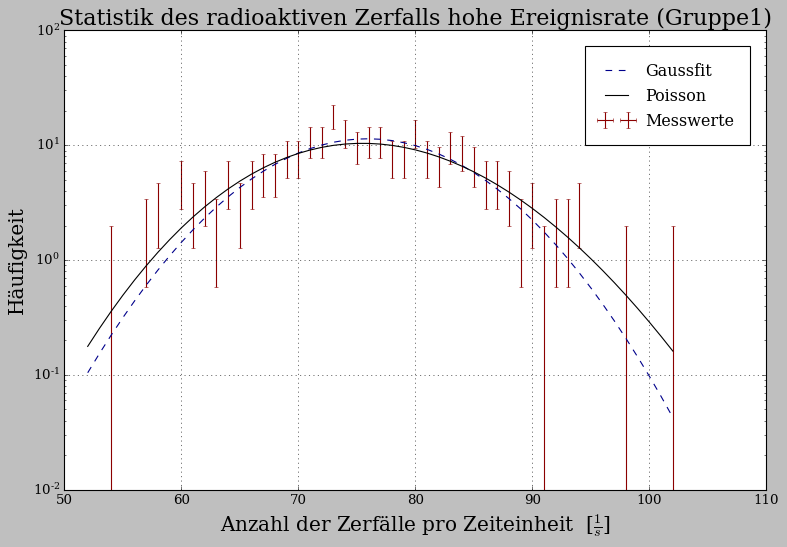

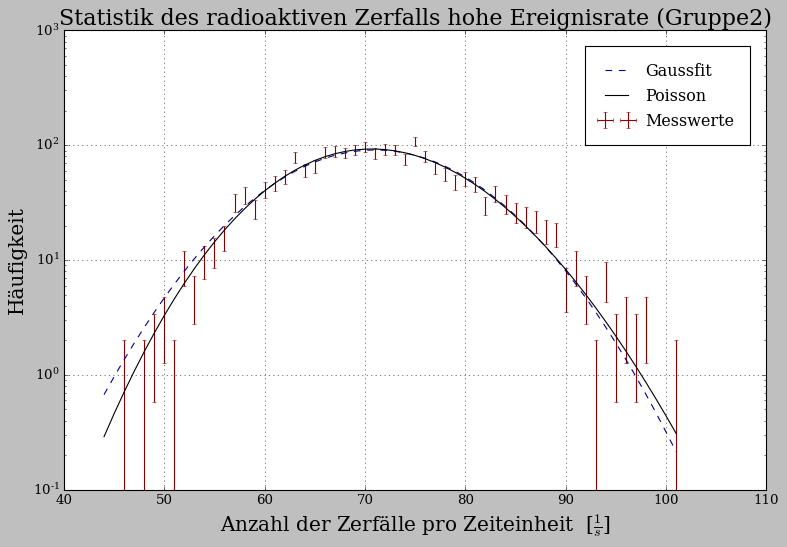

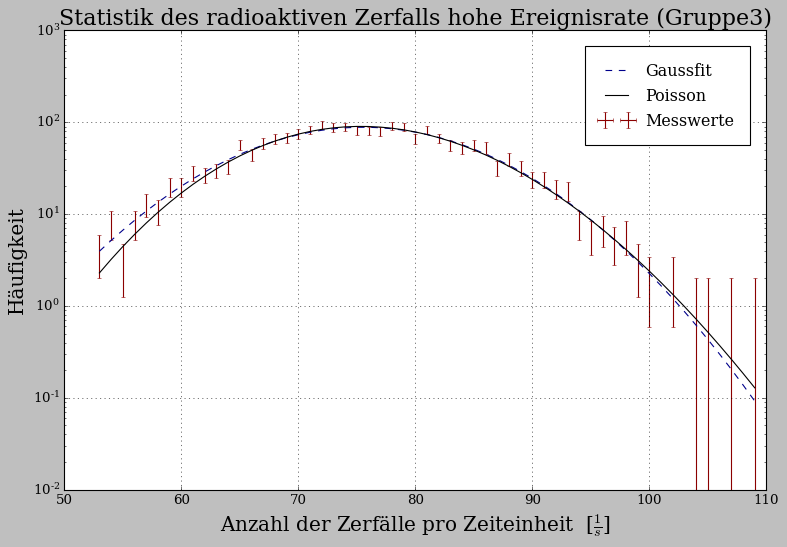

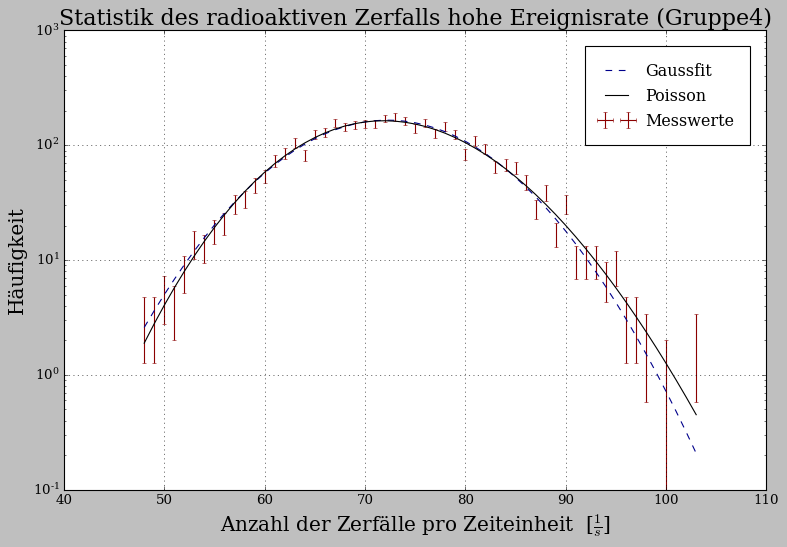

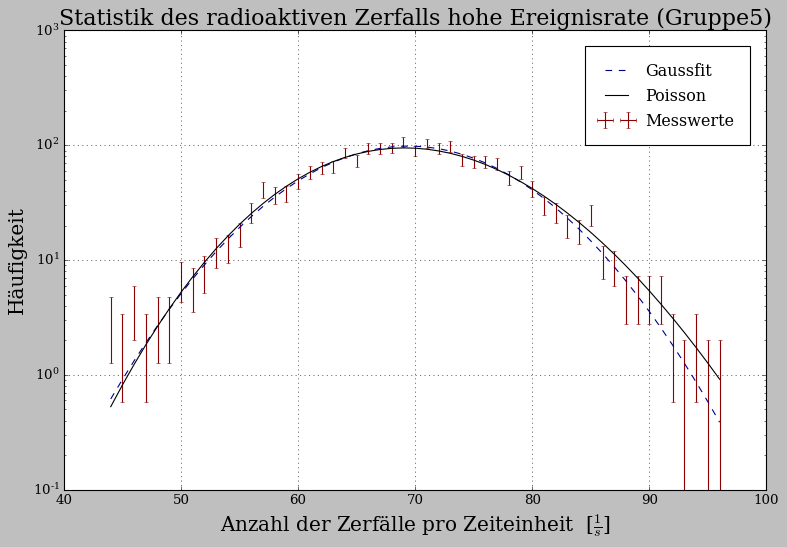

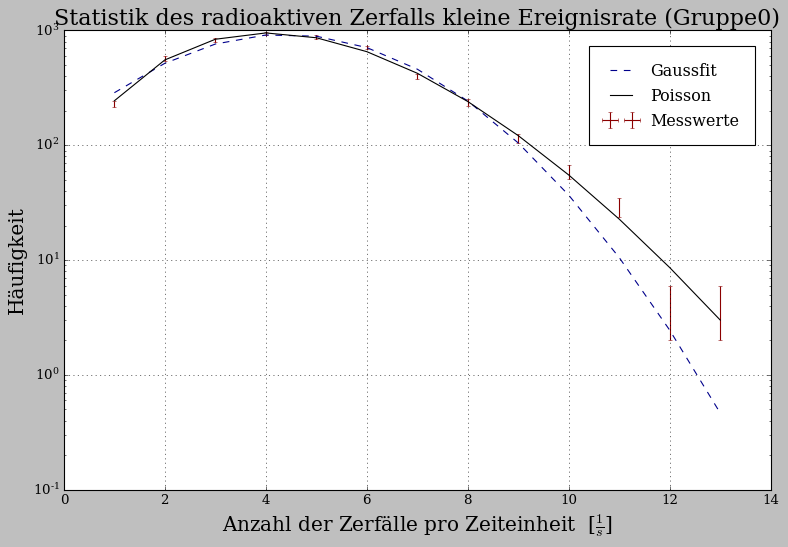

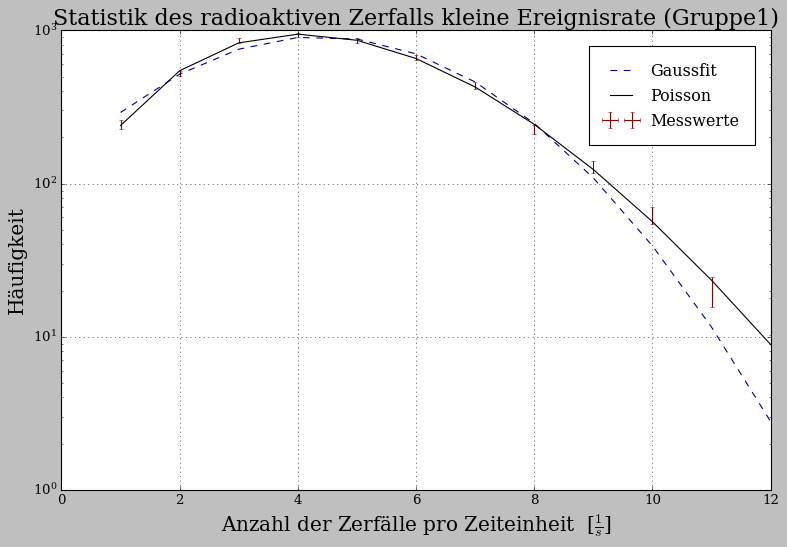

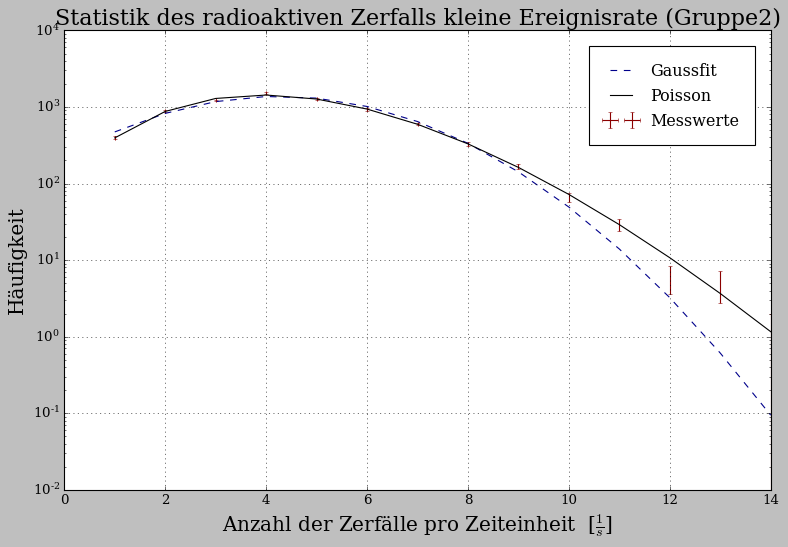

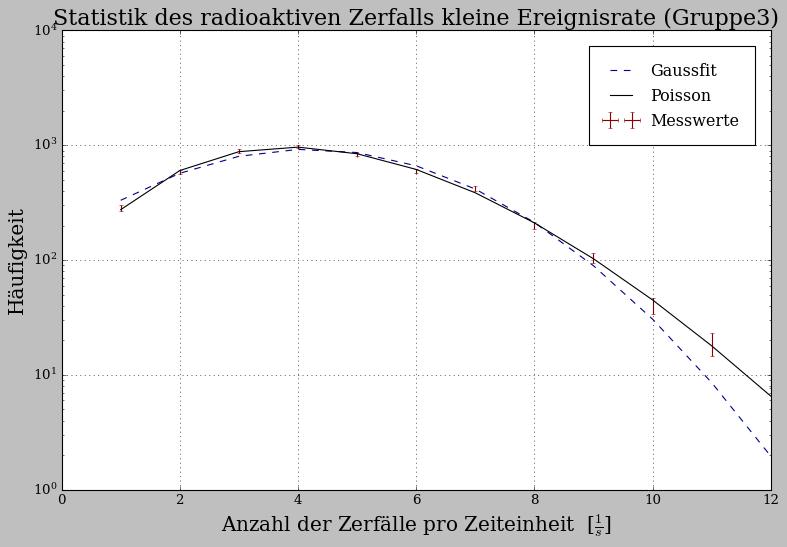


 1. Zählrohrcharakteristik


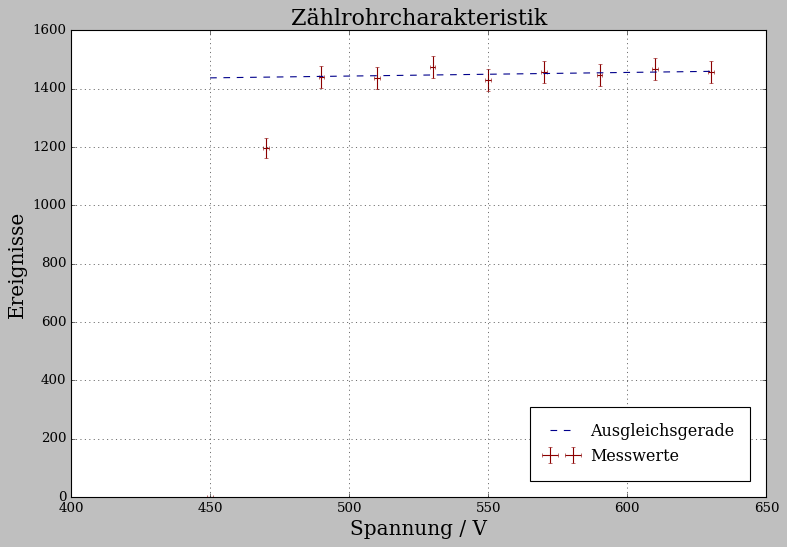

Die Fitwahrscheinlichkeit beträgt 99.0
Die Ausgleichsgeradensteigung beträgt 0.12+/-0.12

 2. Untersuchung des Plateauanstiegs
Der Anstieg beträgt [45.0+/-75.14652353901675 48.0+/-132.34047000067667]
Der prozentuale Anstiegt beträgt [0.01606569082470546+/-0.027043112728631625
 0.005496392992098935+/-0.015195656616178816]
Die Abweichung beträgt 0.3407257066288795

 3. Hohe mittlere Ereigniszahl


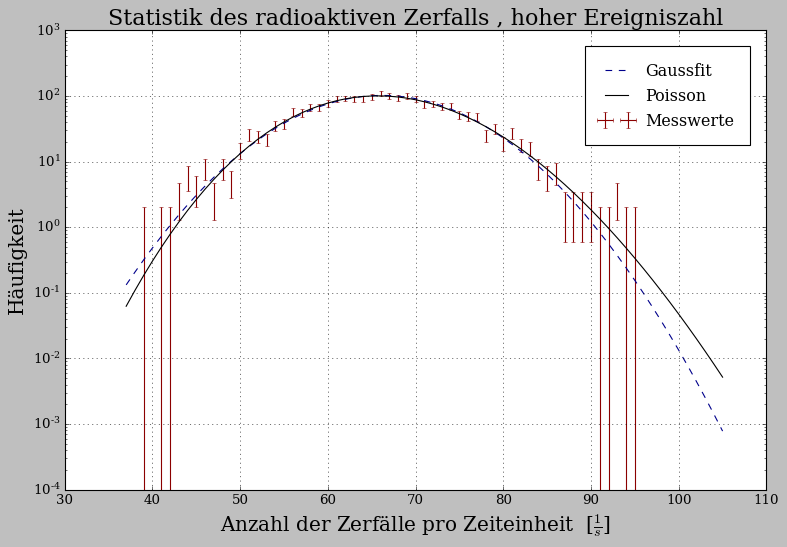

Für den Gauß-Fit ergibt sich
A = (2.05+/-0.04)e+03 1/s
mu = 66.17+/-0.17 1/s
sigma = 8.00+/-0.13 1/s

Für Poisson-Fit ergibt sich
A = (2.05+/-0.04)e+03 1/s
mu = 66.19+/-0.16 1/s

Abweichung A beträgt 0.0015872474967880414
Abweichung mu beträgt 0.0888267145527337

Die Fitwahrscheinlichkeit beträgt für Gauss 78.0

Die Fitwahrscheinlichkeit beträgt für Poisson 87.0

4. kleine mittlere Ereignisrate


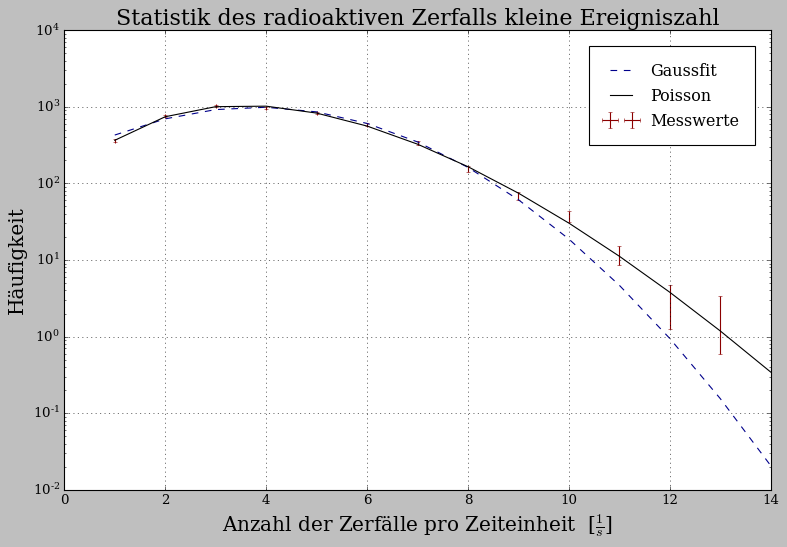

Für den Gauß-Fit ergibt sich
A = (5.44+/-0.18)e+03 1/s
mu = 3.83+/-0.08 1/s
sigma = 2.19+/-0.07 1/s

Für Poisson-Fit ergibt sich
A = (5.24+/-0.06)e+03 1/s
mu = 4.061+/-0.025 1/s

Abweichung A beträgt 1.1144260504152586
Abweichung mu beträgt 2.5887450462770167

 Die Fitwahrscheinlichkeit beträgt für Gauss 0.0

 Die Fitwahrscheinlichkeit beträgt für Poisson 68.0


In [1]:
import pandas as pd
import numpy as np
import scipy.constants as const
from scipy.special import gamma
from scipy.stats import chi2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unp
import prettytable as pt
import os


def calc_all_data(data_names_A3, data_names_A4, startindex):
    tab2 = pt.PrettyTable()
    tab2.title = 'Ergebnis aus allen Messwerten'
    tab2 = pt.PrettyTable(['A3', 'A Gauss 1/s', 'A Poisson 1/s', 'mu Gauss 1/s', 'mu Poisson 1/s', 'sigma A', 'sigma mu', 'Prob Guass', 'Prob Poiss'])
    for i in range(len(data_names_A3)):
        data = pd.read_csv(os.path.join('A3', data_names_A3[i]), delimiter='\s+')
        data.columns = ['A', 'N']  # A = Anzahl, N = Häufigkeit

        p = [2000, 75, 8]
        p2 = [2000, 75]
        popt, pcov = curve_fit(gaussian_fit, data['A'][start:-start], data['N'][start:-start], sigma=data['N'][start:-start] ** 0.5, p0=p)
        popt2, pcov2 = curve_fit(poisson_fit, data['A'][start:-start], data['N'][start:-start], sigma=data['N'][start:-start] ** 0.5, p0=p2)

        probability = calc_prob(gaussian_fit, popt, data['A'][start:-start], unp.uarray(data['N'][start:-start], data['N'][start:-start] ** 0.5), 3)
        probability2 = calc_prob(poisson_fit, popt2, data['A'][start:-start], unp.uarray(data['N'][start:-start], data['N'][start:-start] ** 0.5), 2)

        if plotdata: plot_data(2, data['A'], data['N'], gaussian_fit, popt, poisson_fit, popt2, save_fit, 'results/V251Diagramm{0}.pdf'.format(startindex + i), extra='hohe Ereignisrate (Gruppe{0})'.format(i))

        A = unc.ufloat(popt[0], pcov[0, 0]**0.5)
        a = unc.ufloat(popt2[0], pcov2[0, 0]**0.5)
        Mu = unc.ufloat(popt[1], pcov[1, 1]**0.5)
        mu = unc.ufloat(popt2[1], pcov2[1, 1]**0.5)
        Sig = calc_sigma(unc.ufloat(popt[0], pcov[0, 0] ** 0.5), unc.ufloat(popt2[0], pcov2[0, 0] ** 0.5))
        sig = calc_sigma(unc.ufloat(popt2[1], pcov2[1, 1] ** 0.5), unc.ufloat(popt[1], pcov[1, 1] ** 0.5))
        tab2.add_row(['Hohe Ereignisrate', A, a, Mu, mu, Sig, sig, probability, probability2])

    for i in range(len(data_names_A4)):
        data = pd.read_csv(os.path.join('A4', data_names_A4[i]), delimiter='\s+')
        data.columns = ['A', 'N']  # A = Anzahl, N = Häufigkeit

        popt, pcov = curve_fit(gaussian_fit, data['A'][:-2], data['N'][:-2], sigma=data['N'][:-2] ** 0.5, p0=[7.6, 4.4, 2])
        popt2, pcov2 = curve_fit(poisson_fit, data['A'][:-2], data['N'][:-2], sigma=data['N'][:-2] ** 0.5)

        probability = calc_prob(gaussian_fit, popt, data['A'][:-2], unp.uarray(data['N'][:-2], data['N'][:-2] ** 0.5), 3)
        probability2 = calc_prob(poisson_fit, popt2, data['A'][:-2], unp.uarray(data['N'][:-2], data['N'][:-2] ** 0.5), 2)

        if plotdata : plot_data(2, data['A'][:-1], data['N'][:-1], gaussian_fit, popt, poisson_fit, popt2, save_fit, 'results/V251Diagramm{0}.pdf'.format(startindex + i + len(data_names_A3)), extra='kleine Ereignisrate (Gruppe{0})'.format(i))

        A = unc.ufloat(popt[0], pcov[0, 0]**0.5)
        a = unc.ufloat(popt2[0], pcov2[0, 0]**0.5)
        Mu = unc.ufloat(popt[1], pcov[1, 1]**0.5)
        mu = unc.ufloat(popt2[1], pcov2[1, 1]**0.5)
        Sig = calc_sigma(unc.ufloat(popt[0], pcov[0, 0] ** 0.5), unc.ufloat(popt2[0], pcov2[0, 0] ** 0.5))
        sig = calc_sigma(unc.ufloat(popt2[1], pcov2[1, 1] ** 0.5), unc.ufloat(popt[1], pcov[1, 1] ** 0.5))

        tab2.add_row(['Kleine Ereignisrate', A, a, Mu, mu, Sig, sig, probability, probability2])

    with open('results/AlleMesswerte.txt', 'w') as file:
        file.write(tab2.get_string())


def get_input(prompt):
    while True:
        try:
            return {'true': True, 'false': False}[input(prompt).lower()]
        except KeyError:
            print('Falsche Antwort')

def calc_sigma(x, y):
    return np.abs(unp.nominal_values(x) - unp.nominal_values(y)) / (
        np.sqrt(unp.std_devs(x) ** 2 + unp.std_devs(y) ** 2))


def calc_prob(fit, param, xdata, ydata, num) -> object:
    chi_square = np.sum((fit(unp.nominal_values(xdata), *param) - unp.nominal_values(ydata))**2 / unp.std_devs(ydata) ** 2)
    dof = len(ydata) - num
    chi_square_red = chi_square / dof
    prob = round(1 - chi2.cdf(chi_square, dof), 2) * 100
    return prob

def linear_fit(x, a, b):
    return a*x+b

def gaussian_fit(x, A, mu, sig):
    return A/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/2/sig**2)


def poisson_fit(x, A, mu):
    return A * np.exp(-mu) * mu**x/gamma(x+1)


def plot_data(arg, xdata, ydata, fit = None, popt_ = None, fit2 = None, popt2_ = None, save = False, title = None, extra = None):
    plt.clf()
    plt.grid(ls='dotted')
    if arg == 1:
        plt.errorbar(unp.nominal_values(xdata), unp.nominal_values(ydata), xerr=unp.std_devs(xdata), yerr=unp.std_devs(ydata), fmt='none', marker='.', color='darkred', label='Messwerte')
        plt.plot(unp.nominal_values(xdata), fit(unp.nominal_values(xdata), *popt_), marker=None, ls='--', color='darkblue', label='Ausgleichsgerade')
        plt.title('Zählrohrcharakteristik', size=20)
        plt.xlabel('Spannung / V', size=18)
        plt.ylabel('Ereignisse', size=18)
        if save : plt.savefig(title, format='PDF')

    if arg == 2:
        plt.errorbar(xdata, ydata, xerr=0, yerr=np.sqrt(ydata), fmt='none', marker='.', color='darkred', label='Messwerte')
        plt.plot(xdata, fit(xdata, *popt_), marker=None, ls='--', color='darkblue', label='Gaussfit')
        plt.plot(xdata, fit2(xdata, *popt2_), marker=None, ls='-', color='black', label='Poisson')
        plt.title('Statistik des radioaktiven Zerfalls {0}'.format(extra), size=20)
        plt.xlabel(r'Anzahl der Zerfälle pro Zeiteinheit  [$\frac{1}{s}$]', size=18)
        plt.ylabel('Häufigkeit', size=18)
        plt.yscale('log')
        plt.tight_layout()
        plt.legend(frameon=True, loc=1, borderpad=1, borderaxespad=1)
        if save : plt.savefig(title, format='PDF')
    plt.tight_layout()
    plt.legend(frameon=True, loc='best', borderpad=1, borderaxespad=1)
    plt.show()
    return

# Einstellungen
plt.style.use('classic')
plt.rcParams["font.family"] = 'serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize'] = 2
save_fit = get_input('Sollen die Diagramme gespeichert werden? ') #Speichern
plotdata = get_input('Sollen die Diagramme angezeigt werden? ') #Sofort zeichnen?
draw_table = get_input('Tabelle erstellen? ')
start = 10
start_index = 4
#Für die Auswertung aller
data_A3_name = os.listdir('A3/')
data_A4_name = os.listdir('A4/')
calc_all_data(data_A3_name, data_A4_name, 4)


# 1. Zählrohrcharakteristik
print('\n 1. Zählrohrcharakteristik')
U = np.array([450, 470, 490, 510, 530, 550, 570, 590, 610, 630]) #Unsere Messwerte eingeben
U = unp.uarray(U, 1)
N = np.array([0, 1196, 1440, 1437, 1474, 1429, 1458, 1446, 1467, 1456]) # Nicht vergessen
N = unp.uarray(N, np.sqrt(N)) # Hello there
popt, pcov = curve_fit(linear_fit, unp.nominal_values(U[2:]), unp.nominal_values(N[2:]), sigma=unp.std_devs(N[2:]))
if plotdata : plot_data(1, U, N, linear_fit, popt, save_fit, 'results/V251Diagramm1.pdf')

prob = calc_prob(linear_fit, popt, U[2:], N[2:], 2)
m = unc.ufloat(popt[0], np.sqrt(pcov[0, 0]))
## Feedback
print('Die Fitwahrscheinlichkeit beträgt '+str(prob))
print('Die Ausgleichsgeradensteigung beträgt '+str(m))

# 2. Plateauanstieg
print('\n 2. Untersuchung des Plateauanstiegs')
## Messdauer 60s
N0 = unp.uarray([2801, 8733], [2801**0.5, 8733**0.5]) #Messwerte
##Messdauer 180s
N1 = unp.uarray([2846, 8781], [2846**0.5, 8781**0.5]) #Messwerte

anstieg = N1 - N0
proz_anstieg = anstieg / N0

#Feedback
print('Der Anstieg beträgt '+str(anstieg))
print('Der prozentuale Anstiegt beträgt '+str(proz_anstieg))
print('Die Abweichung beträgt '+str(calc_sigma(proz_anstieg[0], proz_anstieg[1])))


# 3. Hoher mittlerer Ereigniszahl
print('\n 3. Hohe mittlere Ereigniszahl')
data = pd.read_csv('data3.txt', delimiter='\s+')
data.columns = ['A', 'N'] # A = Anzahl, N = Häufigkeit

p = [2000, 75, 8]
popt2, pcov2 = curve_fit(gaussian_fit, data['A'][start:-start], data['N'][start:-start], sigma = data['N'][start:-start]**0.5, p0 = p)
p2 = [2000, 75]
popt3, pcov3 = curve_fit(poisson_fit, data['A'][start:-start], data['N'][start:-start], sigma = data['N'][start:-start]**0.5, p0 = p2)

prob = calc_prob(gaussian_fit, popt2, data['A'][start:-start], unp.uarray(data['N'][start:-start], data['N'][start:-start]**0.5), 3)
prob2 = calc_prob(poisson_fit, popt3, data['A'][start:-start], unp.uarray(data['N'][start:-start], data['N'][start:-start]**0.5), 2)

if plotdata : plot_data(2, data['A'], data['N'], gaussian_fit, popt2, poisson_fit, popt3, save_fit, 'results/V251Diagramm2.pdf', extra = ', hoher Ereigniszahl')

## Feedback
print('Für den Gauß-Fit ergibt sich')
print('A = ' +str(unc.ufloat(popt2[0], pcov2[0, 0]**0.5)) + ' 1/s')
print('mu = ' +str(unc.ufloat(popt2[1], pcov2[1, 1]**0.5)) + ' 1/s')
print('sigma = ' +str(unc.ufloat(popt2[2], pcov2[2, 2]**0.5)) + ' 1/s')
print('\nFür Poisson-Fit ergibt sich')
print('A = '+str(unc.ufloat(popt3[0], pcov3[0, 0]**0.5))+ ' 1/s')
print('mu = '+str(unc.ufloat(popt3[1], pcov3[1, 1]**0.5))+ ' 1/s')
print('\nAbweichung A beträgt '+str(calc_sigma(unc.ufloat(popt2[0], pcov2[0, 0]**0.5), unc.ufloat(popt3[0], pcov3[0, 0]**0.5))))
print('Abweichung mu beträgt '+str(calc_sigma(unc.ufloat(popt2[1], pcov2[1, 1]**0.5), unc.ufloat(popt3[1], pcov3[1, 1]**0.5))))
print('\nDie Fitwahrscheinlichkeit beträgt für Gauss '+str(prob))
print('\nDie Fitwahrscheinlichkeit beträgt für Poisson '+str(prob2))

# 4. kleiner mittlerer Ereignisrate
print('\n4. kleine mittlere Ereignisrate')
data2 = pd.read_csv('data4.txt', delimiter='\s+')
data2.columns = ['A', 'N'] # A = Anzahl, N = Häufigkeit


popt4, pcov4 = curve_fit(gaussian_fit, data2['A'][:-2], data2['N'][:-2], sigma = data2['N'][:-2]**0.5, p0 = [7.6, 4.4, 2])
popt5, pcov5 = curve_fit(poisson_fit, data2['A'][:-2], data2['N'][:-2], sigma = data2['N'][:-2]**0.5)

prob = calc_prob(gaussian_fit, popt4, data2['A'][:-2], unp.uarray(data2['N'][:-2], data2['N'][:-2]**0.5), 3)
prob2 = calc_prob(poisson_fit, popt5, data2['A'][:-2], unp.uarray(data2['N'][:-2], data2['N'][:-2]**0.5), 2)

if plotdata : plot_data(2, data2['A'][:-1], data2['N'][:-1], gaussian_fit, popt4, poisson_fit, popt5, save_fit, 'results/V251Diagramm3.pdf', extra = 'kleine Ereigniszahl')

## Feedback
print('Für den Gauß-Fit ergibt sich')
print('A = ' +str(unc.ufloat(popt4[0], pcov4[0, 0]**0.5)) + ' 1/s')
print('mu = ' +str(unc.ufloat(popt4[1], pcov4[1, 1]**0.5)) + ' 1/s')
print('sigma = ' +str(unc.ufloat(popt4[2], pcov4[2, 2]**0.5)) + ' 1/s')
print('\nFür Poisson-Fit ergibt sich')
print('A = '+str(unc.ufloat(popt5[0], pcov5[0, 0]**0.5))+ ' 1/s')
print('mu = '+str(unc.ufloat(popt5[1], pcov5[1, 1]**0.5))+ ' 1/s')
print('\nAbweichung A beträgt '+str(calc_sigma(unc.ufloat(popt4[0], pcov4[0, 0]**0.5), unc.ufloat(popt5[0], pcov5[0, 0]**0.5))))
print('Abweichung mu beträgt '+str(calc_sigma(unc.ufloat(popt4[1], pcov4[1, 1]**0.5), unc.ufloat(popt5[1], pcov5[1, 1]**0.5))))
print('\n Die Fitwahrscheinlichkeit beträgt für Gauss '+str(prob))
print('\n Die Fitwahrscheinlichkeit beträgt für Poisson '+str(prob2))

## Tabelle
if draw_table:

    a31 = unc.ufloat(popt2[0], pcov2[0, 0]**0.5)
    a32 = unc.ufloat(popt3[0], pcov3[0, 0]**0.5)
    mu31 = unc.ufloat(popt2[1], pcov2[1, 1]**0.5)
    mu32 = unc.ufloat(popt3[1], pcov3[1, 1]**0.5)
    sig31 = calc_sigma(unc.ufloat(popt2[0], pcov2[0, 0]**0.5), unc.ufloat(popt3[0], pcov3[0, 0]**0.5))
    sig32 = calc_sigma(unc.ufloat(popt2[1], pcov2[1, 1]**0.5), unc.ufloat(popt3[1], pcov3[1, 1]**0.5))

    a41 = unc.ufloat(popt4[0], pcov4[0, 0]**0.5)
    a42 = unc.ufloat(popt5[0], pcov5[0, 0]**0.5)
    mu41 = unc.ufloat(popt4[1], pcov4[1, 1]**0.5)
    mu42 = unc.ufloat(popt5[1], pcov5[1, 1]**0.5)
    sig41 = calc_sigma(unc.ufloat(popt4[0], pcov4[0, 0]**0.5), unc.ufloat(popt5[0], pcov5[0, 0]**0.5))
    sig42 = calc_sigma(unc.ufloat(popt4[1], pcov4[1, 1]**0.5), unc.ufloat(popt5[1], pcov5[1, 1]**0.5))

    tab = pt.PrettyTable(['A3', 'A Gauss 1/s', 'A Poisson 1/s', 'mu Gauss 1/s', 'mu Poisson 1/s', 'sigma A', 'sigma mu'])
    tab.title = 'Zusammenfassung der Ergebnisse zu 3 und 4'
    tab.add_row(['Hohe Ereigniszahl', a31, a32, mu31, mu32, sig31, sig32])
    tab.add_row(['Kleine Ereigniszahl', a41, a42, mu41, mu42, sig41, sig42])

    with open('results/Zusammenfassung.txt', 'w') as file:
        file.write(tab.get_string())